In [1]:
from sklearn.svm import SVC
from sklearn.metrics import scorer
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.svm import SVR
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
import seaborn

from pandas_datareader import data as pdr

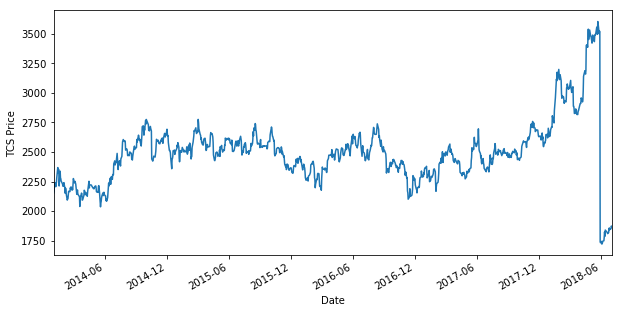

In [8]:
Df = quandl.get('NSE/TCS',start_date="2014-01-01", end_date="2018-07-04")
Df = Df.dropna()
Df.Close.plot(figsize=(10,5))
plt.ylabel("TCS Price")
plt.show()

In [9]:
y = np.where(Df['Close'].shift(-1)>Df['Close'],1,-1)

In [10]:
Df['Open-Close'] = Df.Open - Df.Close
Df['High-Low'] = Df.High - Df.Low

x = Df[['Open-Close','High-Low']]

In [11]:
split_percentage = 0.9
split = int(split_percentage*len(Df))

x_train = x[:split]
y_train = y[:split]
# print(x_train)
# print(y_train)
x_test = x[split:]
y_test = y[split:]

In [12]:

cls = tree.DecisionTreeClassifier()
cls=cls.fit(x_train,y_train)

In [13]:
accuracy_train = accuracy_score(y_train,cls.predict(x_train))

accuracy_test = accuracy_score(y_test,cls.predict(x_test))


print('\nTrain Accuracy: {:.2f}%'.format(accuracy_train*100))
print('\nTest Accuracy: {:.2f}%'.format(accuracy_test*100))



Train Accuracy: 100.00%

Test Accuracy: 54.46%


In [16]:
cls = SVC()
cls=cls.fit(x_train,y_train)

In [17]:
accuracy_train = accuracy_score(y_train,cls.predict(x_train))

accuracy_test = accuracy_score(y_test,cls.predict(x_test))


print('\nTrain Accuracy: {:.2f}%'.format(accuracy_train*100))
print('\nTest Accuracy: {:.2f}%'.format(accuracy_test*100))



Train Accuracy: 91.22%

Test Accuracy: 46.43%


In [97]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
import quandl
import matplotlib.pyplot as plt
numpy.random.seed(7)

Using TensorFlow backend.


In [109]:
x = np.array(x)
y = np.array(y)

model = Sequential()
model.add(Dense(20,input_dim=2,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(70,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='softplus'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x,y,epochs=1000,batch_size=10)

Epoch 1/1000
1113/1113 [==============================] - 1s 1ms/step - loss: 0.2420 - acc: 0.0027  
Epoch 2/1000
1113/1113 [==============================] - 0s 354us/step - loss: 0

In [110]:
scores = model.evaluate(x,y)
print("\n\n%s: %.2f%%"% (model.metrics_names[1],scores[1]*100))

1113/1113 [==============================] - 0s 219us/step


acc: 0.36%


In [111]:
from sklearn.neighbors import KNeighborsClassifier


In [112]:
KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [113]:
model.fit(x, y)

Epoch 1/1
1113/1113 [==============================] - 0s 144us/step - loss: -0.1372 - acc: 0.0036


In [114]:
predicted= model.predict(x_test)

In [115]:
print(predicted)

[[2.0370792e-04]
 [2.1075584e-02]
 [0.0000000e+00]
 [0.0000000e+00]
 [1.2873816e-01]
 [1.5529251e-03]
 [4.3266579e-07]
 [0.0000000e+00]
 [3.6187501e-08]
 [0.0000000e+00]
 [3.3042617e-03]
 [2.7902517e-01]
 [0.0000000e+00]
 [0.0000000e+00]
 [3.8503099e-03]
 [0.0000000e+00]
 [0.0000000e+00]
 [2.0810156e-03]
 [8.8021153e-04]
 [0.0000000e+00]
 [1.1169997e-02]
 [2.1381377e-01]
 [0.0000000e+00]
 [3.7526127e-02]
 [2.4855603e-01]
 [0.0000000e+00]
 [3.7571251e-02]
 [0.0000000e+00]
 [2.0227227e-03]
 [6.2702122e-05]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [1.8553287e-02]
 [0.0000000e+00]
 [7.4466271e-03]
 [0.0000000e+00]
 [5.8768452e-05]
 [0.0000000e+00]
 [0.0000000e+00]
 [3.6753740e-03]
 [0.0000000e+00]
 [0.0000000e+00]
 [2.1802086e-01]
 [1.5379950e-01]
 [2.0035507e-02]
 [4.0845787e-03]
 [1.2032544e-02]
 [2.7305186e-08]
 [3.6923144e-02]
 [1.0287233e-04]
 [0.0000000e+00]
 [0.0000000e+00]
 [1.0858710e-07]
 [0.0000000e+00]
 [0.0000000e+00]
 [1.8238856e-05]
 [1.5090757e-04]
 [3.1417634e-0

In [18]:
from sklearn.ensemble import RandomForestClassifier
#Import Library
from sklearn.ensemble import RandomForestClassifier
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create Random Forest object
model= RandomForestClassifier()
# Train the model using the training sets and check score
model.fit(x, y)
#Predict Output
predicted= model.predict(x_test)
print(predicted)



[-1  1 -1  1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1  1  1 -1  1  1  1  1 -1  1
 -1  1  1 -1 -1 -1  1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1 -1  1
 -1 -1  1  1  1  1  1 -1 -1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1  1  1 -1
  1 -1  1  1 -1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1  1  1  1  1  1  1
 -1  1 -1 -1 -1 -1 -1  1  1  1 -1  1  1  1 -1 -1]


In [19]:
accuracy_train = accuracy_score(y_train,model.predict(x_train))

accuracy_test = accuracy_score(y_test,model.predict(x_test))


print('\nTrain Accuracy: {:.2f}%'.format(accuracy_train*100))
print('\nTest Accuracy: {:.2f}%'.format(accuracy_test*100))



Train Accuracy: 97.21%

Test Accuracy: 99.11%
